## CSCE 633
## Homework 1: Linear models

#### Due: 11:59pm on September 21, 2023

## Part A- Linear Regression

### Reading Data

In [1]:
# Question A
import pandas as pd

file_path = './hw1_q1_data.csv'

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(file_path)

In [2]:
df.head()

,name,stamina,attack_value,defense_value,capture_rate,flee_rate,spawn_chance,combat_point
0,Bulbasaur,90,126,126,0.16,0.10,69.0,1079
1,Ivysaur,120,156,158,0.08,0.07,4.2,1643
2,Venusaur,160,198,200,0.04,0.05,1.7,2598
3,Charmander,78,128,108,0.16,0.10,25.3,962
4,Charmeleon,116,160,140,0.08,0.07,1.2,1568


### (A-i) (5 points) Data exploration:

In [3]:
# Import required packages here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def get_pearson_coeff(feature1, feature2):
    '''
    given 2 feature names return the Pearson’s correlation coefficient between them
    '''
  ### YOUR CODE HERE
    correlation_coefficient = np.corrcoef(df[feature1], df[feature2])[0, 1]
    return correlation_coefficient
  ### YOUR CODE HERE

def plot_scatter(feature1, feature2):
    '''
    Plot a 2D Scatter Plot between the 2 features, make sure to label the plots properly
    '''
### YOUR CODE HERE
    # X axis is feature 1 and Y axis is feature 2
    X, y = df[feature1], df[feature2]
    # Fit a 1st degree polynomial to the data: m is slope and c is intercept of the line
    m, c = np.polyfit(X, y, 1)
    # Generate y-values for the line of best fit
    y_fit = m * X + c
    
    plt.scatter(X, y, label=feature1, alpha=0.4) # Create a scatter plot of the original data
    plt.plot(X, y_fit, 'r') # Plot red line of best fit
    plt.xlabel(feature1)
    plt.ylabel(feature2)
    plt.legend()
    plt.title('Scatter Plots of {} vs. {}'.format(feature1, feature2))
    plt.show()

  ### YOUR CODE HERE

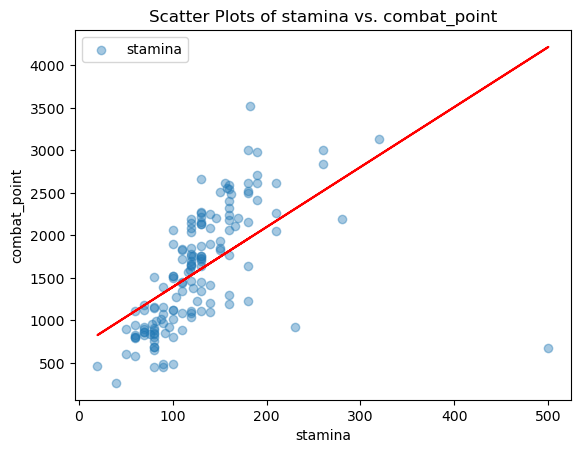

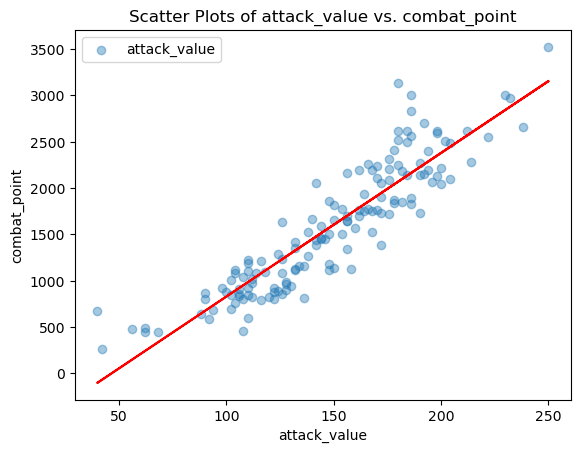

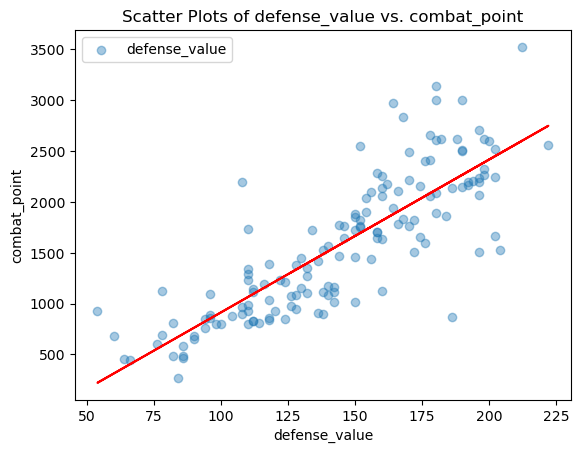

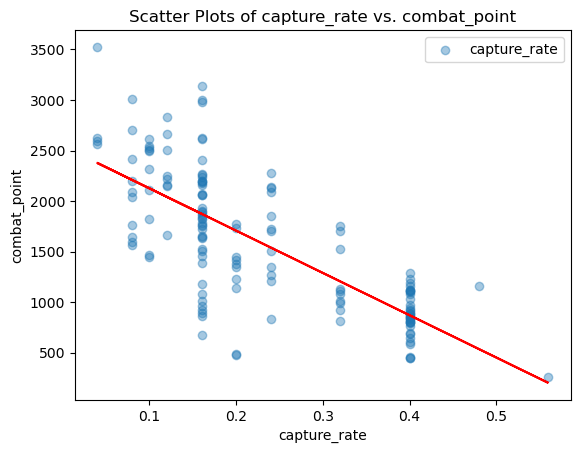

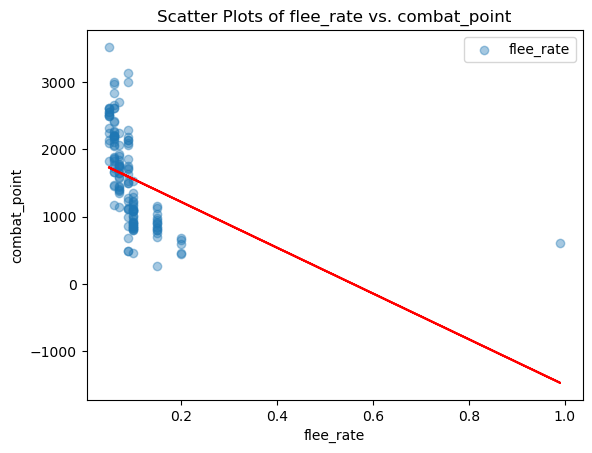

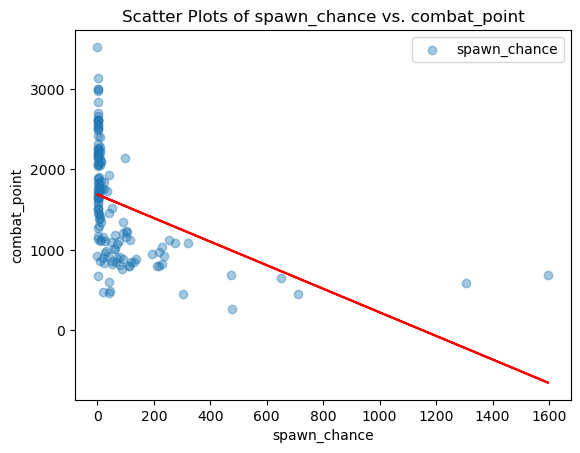

The most predictive feature of Combat Points is 'attack_value' with a correlation coefficient of 0.908


,feature,corr
0,stamina,0.582832
1,attack_value,0.907532
2,defense_value,0.826229
3,capture_rate,-0.743008
4,flee_rate,-0.407034
5,spawn_chance,-0.421327


In [5]:
features_list = [col for col in df.columns if col not in ['combat_point', 'name']] # This list stores the features in the data
coeff_list = [] # This list stores the Pearson correlation coefficient

### YOUR CODE HERE
# This is the outcome of interest
outcome = 'combat_point' 

# Plot scatter plots for each feature against the outcome
for feature in features_list:
    plot_scatter(feature, outcome)

# Compute the Pearson's correlation coefficients
for feature in features_list:
    coeff_list.append(get_pearson_coeff(feature, outcome))

# Identify the most predictive feature (highest absolute correlation coefficient)
max_coeff_index = np.argmax(np.abs(coeff_list))
most_predictive_feature = features_list[max_coeff_index]
max_coeff_value = coeff_list[max_coeff_index]
print(f"The most predictive feature of Combat Points is '{most_predictive_feature}' with a correlation coefficient of {max_coeff_value:.3f}")
### YOUR CODE HERE

data_exploration1_result = pd.DataFrame()
data_exploration1_result['feature'] = features_list
data_exploration1_result['corr'] = coeff_list
data_exploration1_result


#### The most predictive feature of Combat Points is 'attack_value' since it has maximum correlation coefficient=0.908 with 'combat_point' followed by 'defense_value'.

### (A-ii) (5 points) Data exploration:

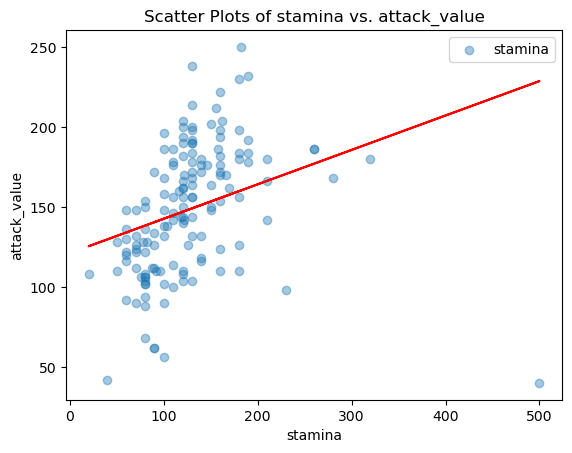

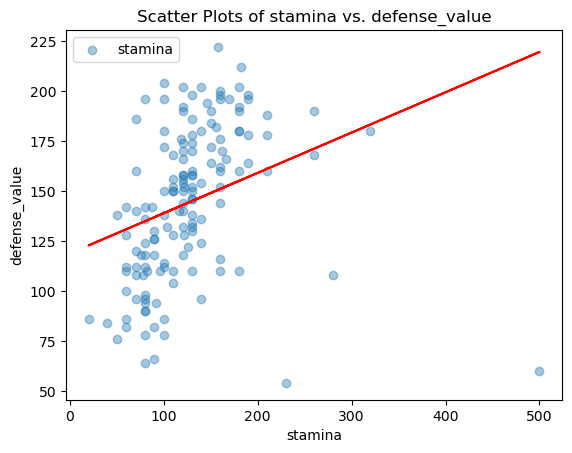

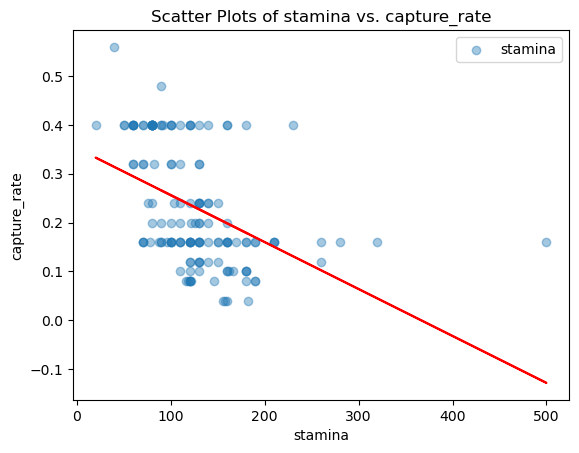

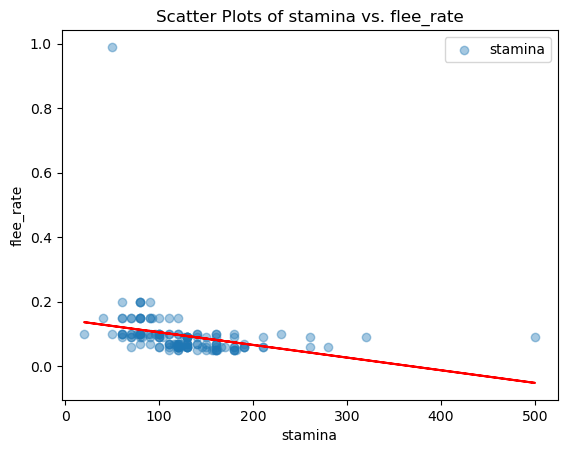

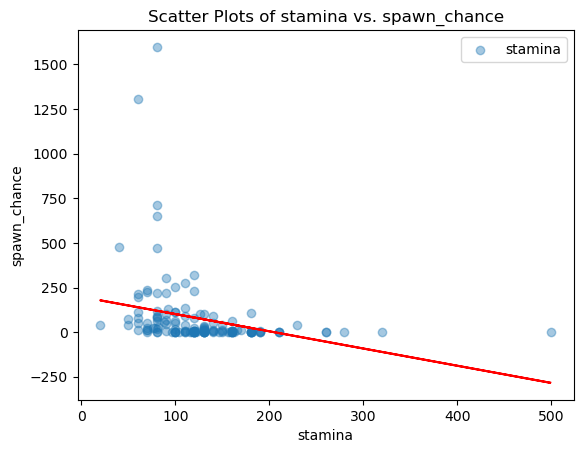

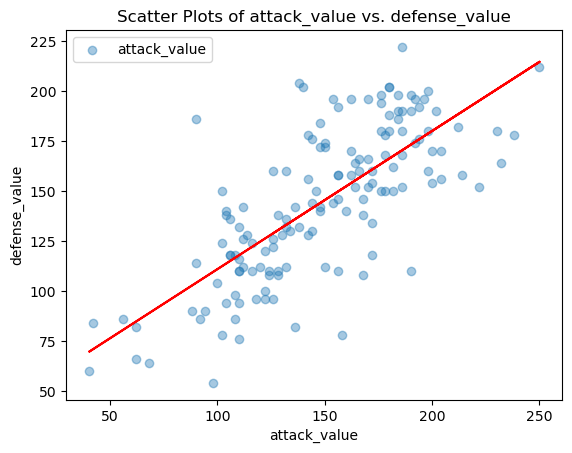

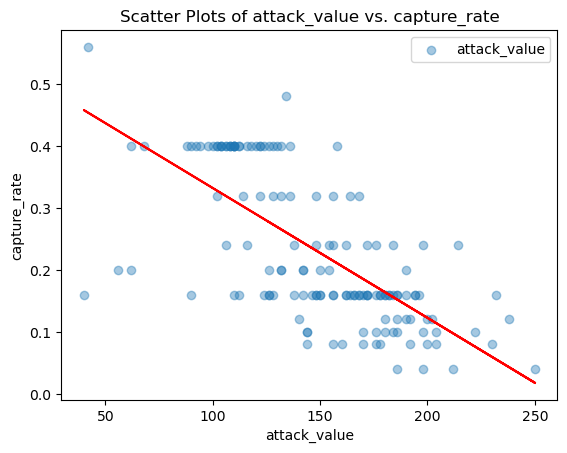

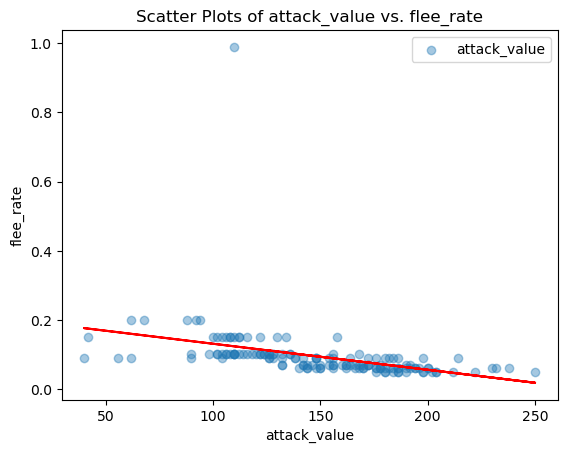

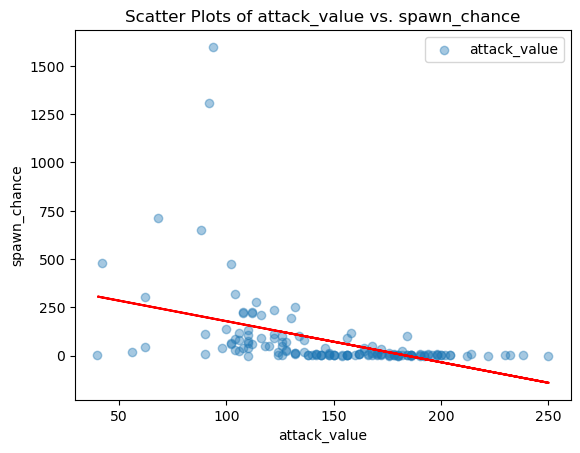

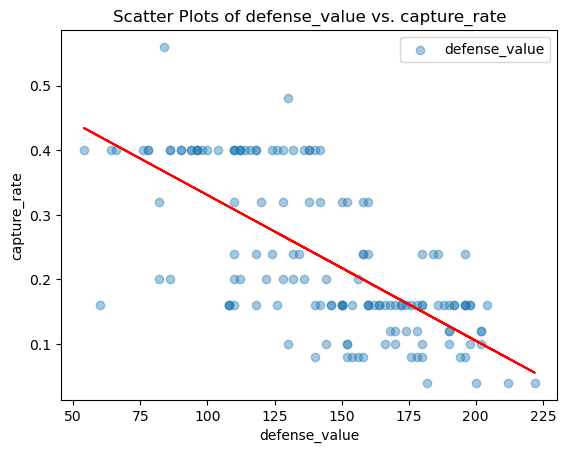

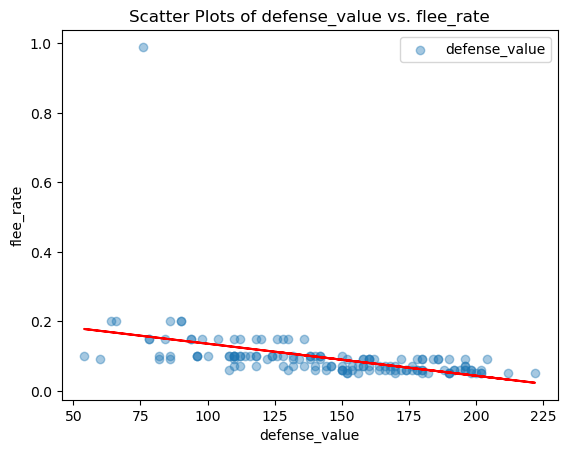

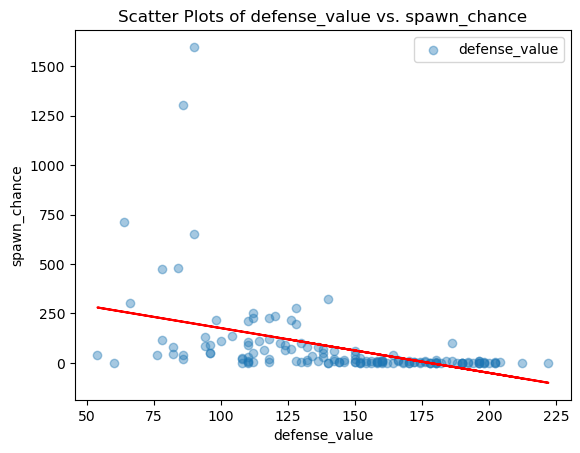

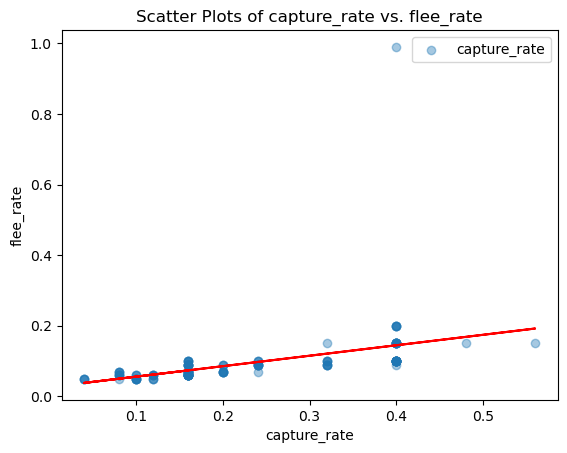

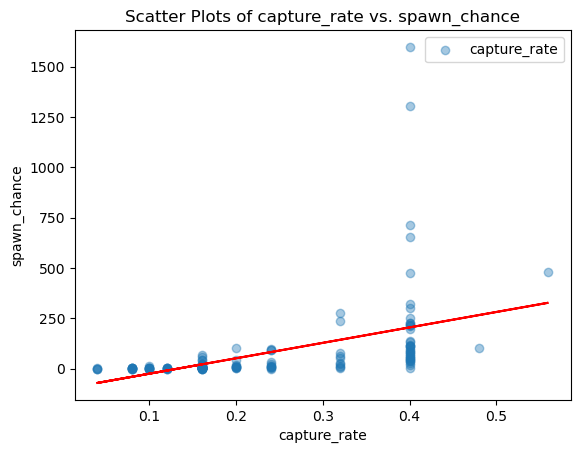

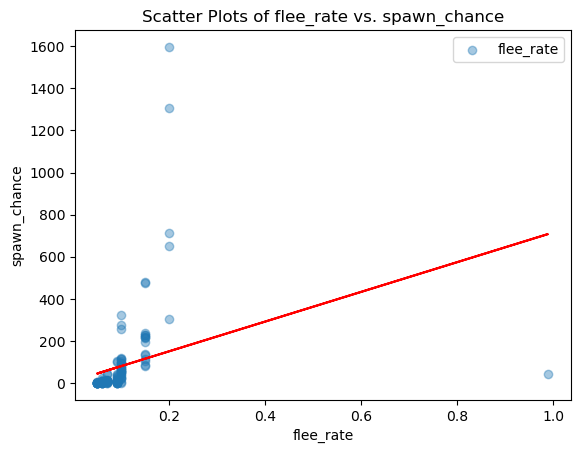

The most correlated features are attack_value and defense_value with a correlation coefficient of 0.737


,Feature1,Feature2,corr_coeff
0,stamina,attack_value,0.302995
1,stamina,defense_value,0.302663
2,stamina,capture_rate,-0.446850
3,stamina,flee_rate,-0.271048
4,stamina,spawn_chance,-0.276420
5,attack_value,defense_value,0.736777
6,attack_value,capture_rate,-0.690573
7,attack_value,flee_rate,-0.369064
8,attack_value,spawn_chance,-0.432648
9,defense_value,capture_rate,-0.697266


In [6]:
n = len(features_list)
feature1_list = []
feature2_list = []
coeff_list = [] # This list stores the Pearson correlation values

for i in range(0,n):
    for j in range(i+1, n):

        feature1_list.append(features_list[i])
        feature2_list.append(features_list[j])

        ### YOUR CODE HERE
        ''' populate coeff_list here '''
        coeff_list.append(get_pearson_coeff(features_list[i], features_list[j]))
        # draw scatter plots between 2 features
        plot_scatter(features_list[i], features_list[j])

# find index of the features which are most correlated
max_corr_index = np.argmax(np.abs(coeff_list))
print(f"The most correlated features are {feature1_list[max_corr_index]} and {feature2_list[max_corr_index]} with a correlation coefficient of {coeff_list[max_corr_index]:.3f}")
        ### YOUR CODE HERE

data_exploration2_result = pd.DataFrame()
data_exploration2_result['Feature1'] = feature1_list
data_exploration2_result['Feature2'] = feature2_list
data_exploration2_result['corr_coeff'] = coeff_list
data_exploration2_result

### The most correlated features are attack_value and defense_value since they have maximum correlation coefficient = 0.737

### (A-iii) (15 points) Predicting combat points:

In [7]:
# Import required packages here
import numpy as np
import itertools

In [8]:
def get_predictions(X_train, y_train, X_test):
    '''
    This function is called in the cell below
    Given the train data, write code for training a linear regression model and
    return the predictions on given test data
    '''
    ### YOUR CODE HERE
    def linear_regression_ols(X, y):
        # Add a column of ones for the intercept term
        X = np.hstack((np.ones((X.shape[0], 1)), X))

        # Compute the OLS (Ordinary Least Squares) solution
        # 1. Calculate matrix product of X transpose and X
        XTX = np.dot(X.T, X)
        # 2. Calculate inverse of XTX
        XTX_inv = np.linalg.inv(XTX)
        # 3. Calculate optimal weight vector w_star using OLS formula
        w_star = np.dot(np.dot(XTX_inv, X.T), y)
        
        # return optimal weight vector
        return w_star

    # Perform linear regression using the OLS function to find optimal weights
    w_star = linear_regression_ols(X_train, y_train)
    
    # Add a column of ones to the test data for the intercept term
    # This is necessary because the model was trained with an intercept term
    X_test_with_intercept = np.hstack((np.ones((X_test.shape[0], 1)), X_test))

    # Make predictions on the test data using optimal weights
    y_pred = np.dot(X_test_with_intercept, w_star)
    
    return y_pred

    ### YOUR CODE HERE

In [9]:
### YOUR CODE HERE
rss_scores = []  # This list stores root mean squared errors for each fold
random_seed = 0
np.random.seed(random_seed)

'''
Loop through the indices split and calculate the root mean squared error
for each fold and append it to rss_scores list
'''

# Perform 5-fold cross-validation and calculate RMSE
def five_fold_cross_validation(X, y, num_folds=5):
    rss_scores = []  # This list stores root mean squared errors for each fold

    # Split the data into num_folds=5 folds
    indices = np.random.permutation(X.shape[0])  # Randomly shuffle the indices
    fold_indices = np.array_split(indices, num_folds)  # Split the shuffled indices into folds

    for i in range(num_folds):
        # Split data into training and test sets for the current fold
        test_indices = fold_indices[i]
        train_indices = np.concatenate([fold_indices[j] for j in range(num_folds) if j != i])

        X_train, X_test = X[train_indices], X[test_indices]
        y_train, y_test = y[train_indices], y[test_indices]

        # Get predictions using the get_predictions function
        y_pred = get_predictions(X_train, y_train, X_test)
        
        # Reshape y_test and y_pred to match dimensions (if they don't)
        y_test = y_test.reshape(-1, 1)
        y_pred = y_pred.reshape(-1, 1)

        # Calculate Residual Sum of Squares (RSS) for this fold
        rss = np.sum((y_test - y_pred) ** 2)
        
        # Calculate the square root of RSS
        sqrt_rss = np.sqrt(rss)
        
        # Append square root of RSS to the rss_scores list for this fold
        rss_scores.append(sqrt_rss)

    return rss_scores

rss_scores = five_fold_cross_validation(df[features_list].values, df[outcome].values, 5)
### YOUR CODE HERE
print(rss_scores)
average_rss = np.mean(rss_scores) # Compute the average rss of all folds
print(average_rss)

[1593.146398602312, 580.1656607122983, 784.8208900568814, 404.8561837739, 628.5131557842539]
798.3004577859291


### (A-iv) (15 points)

In [10]:
'''
  Experiment with different feature combinations and print the best avergae_rss
  Please provide the rationale behind selecting or dropping some features
'''

### YOUR CODE HERE
# Set a random seed for reproducibility
random_seed = 12
np.random.seed(random_seed)

# Initialize a list to store the average of square root of rss
average_sqrt_rss = []

# Iterate over the number of features to exclude from the feature list (keep all features to keep atleast one)
for num_features_to_exclude in range(0, len(features_list)):
    # Generate all combinations of features to exclude
    feature_combinations = itertools.combinations(features_list, num_features_to_exclude)
    # Iterate over each feature combination
    for features_to_exclude in feature_combinations:
        # Create a copy of the feature list with the current features excluded
        features_to_use = [feature for feature in features_list if feature not in features_to_exclude]

        # Prepare the feature matrix (X) and target variable (y)
        X = df[features_to_use].values
        y = df[outcome].values
        
        # Perform 5-fold cross-validation and get scores
        rss_scores = five_fold_cross_validation(X, y, 5)
        
        # Calculate average of rss score for this feature combination
        average_rss = np.mean(rss_scores)
        print(f"For {features_to_use}, average RSS value is {average_rss:.4f}")
        
        # Store the average rss score and corresponding feature combination
        average_sqrt_rss.append([average_rss, features_to_use])

# Find index of feature combination with minimum average rss
min_index = min(range(len(average_sqrt_rss)), key=lambda i: average_sqrt_rss[i][0])

# Get element with minimum average rss and corresponding features used
min_element = average_sqrt_rss[min_index]
min_average_rss = min_element[0]
min_features_to_use = min_element[1]

print(f"The minimum average RSS value is {min_average_rss:.4f} for features {min_features_to_use}.")
### YOUR CODE HERE

For ['stamina', 'attack_value', 'defense_value', 'capture_rate', 'flee_rate', 'spawn_chance'], average RSS value is 854.2804
For ['attack_value', 'defense_value', 'capture_rate', 'flee_rate', 'spawn_chance'], average RSS value is 1362.7363
For ['stamina', 'defense_value', 'capture_rate', 'flee_rate', 'spawn_chance'], average RSS value is 2263.9952
For ['stamina', 'attack_value', 'capture_rate', 'flee_rate', 'spawn_chance'], average RSS value is 1079.2918
For ['stamina', 'attack_value', 'defense_value', 'flee_rate', 'spawn_chance'], average RSS value is 889.7761
For ['stamina', 'attack_value', 'defense_value', 'capture_rate', 'spawn_chance'], average RSS value is 802.2213
For ['stamina', 'attack_value', 'defense_value', 'capture_rate', 'flee_rate'], average RSS value is 1035.5943
For ['defense_value', 'capture_rate', 'flee_rate', 'spawn_chance'], average RSS value is 2250.9876
For ['attack_value', 'capture_rate', 'flee_rate', 'spawn_chance'], average RSS value is 1460.1268
For ['attack_

Question: Please provide the rationale behind selecting or dropping some features

Note: Limit your answer to this cell

Answer: Since the dataset is small, it is possible to train and test for every feature combinations and I am doing the same. The best combination of features is picked based on minimum average value of square root of RSS. The three features finally selected are <b>stamina, attack_value and defense_value</b> which give the minimum average value of square root of RSS = 764.4150.

### (A-v) (10 points)

Question: Explain the mathematical derivation for training the
linear regression model with ordinary least squares (OLS) solution.

---

(You should use LaTeX commands in a markdown cell to write the math)

Note: Limit your answer to this cell

Answer. Training a linear regression model using Ordinary Least Squares (OLS) solution involves finding coefficients that minimize the sum of squared differences between the predicted values and the actual target values. 
%The mathematical derivation for this process can be broken down into several steps.


**Notation:**

- $X$ represents the matrix of independent variables (features).
- $Y$ represents the vector of target values.
- $W$ represents the vector of coefficients (parameters) we want to find.
- $n$ is the number of data points (samples).
- $p$ is the number of features (including the intercept).

**Step 1: Define the Hypothesis Function**

In linear regression, we assume a linear relationship between the independent variable(s) and the target variable:

$Y = w_0 + w_1X_1 + w_2X_2 + \ldots + w_pX_p + \epsilon$

Where:
- $X_j$ represents the $j$th predictor and $w_j$ quantifies the association between that variable and the response.
- $w_0$ is the intercept term.
- $w_j$ (for $i = 1, 2, \ldots, n$) are the coefficients for the independent variables.
- $Y$ is the predicted quantitative response.
- $\epsilon$ is the irreducible error.

**Step 2: Estimating the Regression Coefficients**

The regression coefficients $w_0, w_1,\ldots,w_p$ are unknown and should be estimated as $\hat{w}_0, \hat{w}_1,\ldots,\hat{w}_p$ such that the linear model fits available data well, i.e. $Y_i\approx \hat{w}_0 + \hat{w}_1X_1 + \hat{w}_2X_2 + \ldots + \hat{w}_pX_p$.

Let $\hat{Y}_i=\hat{w}_0 + \hat{w}_1X_1 + \hat{w}_2X_2 + \ldots + \hat{w}_pX_p$ be the prediction for $Y$ based on the $i$ th value of $X$. Then $e_i=Y_i-\hat{Y}_i$ represents the $i$th residual (difference between the $i$ th observed response value and the $i$ th response value that is predicted by our linear model). So, the residual sum of squares (RSS) can be defined as
$$ RSS = e_1^2 + e_2^2 +\ldots+e_n^2$$
or equivalently as
$$ RSS = \sum_{i=1}^{n}(y_i - \hat{y}_i)^2 $$
$$ = \sum_{i=1}^{n}(y_i - \hat{w}_0 - \hat{w}_1X_{i1} + \hat{w}_2X_{i2} + \ldots + \hat{w}_pX_{ip})^2 $$

For simplicity of mathematical derivation, let's assume $p=1$. Thus our $RSS$ value reduces to:

$$ RSS = e_{1}^2 + e_{2}^2 + ... + e_{n}^2 = (y_{1} - \hat{w}_0 - \hat{w}_1X_{1})^2 + ... + (y_{n} - \hat{w}_0 - \hat{w}_1X_{n})^2 $$

The goal is to find $\hat{w}_0$ and $\hat{w}_1$ that minimize $RSS$. This is done by taking partial derivatives and setting them equal to 0.

$$ RSS = \sum_{i=1}^{n} (y_{i} - \hat{w}_0 - \hat{w}_iX_{i})^2 $$

The process for finding $\hat{w}_0$ is as follows:

$$\frac{\partial RSS}{\partial \hat{w}_0} = \sum_{i=1}^{n} -2(y_{i} - \hat{w}_0 - \hat{w}_iX_{i}) = 0$$

$$= -2\sum_{i=1}^{n} y_{i} + 2\sum_{i=1}^{n} \hat{w}_0 + 2\hat{w}_1\sum_{i=1}^{n}X_i$$

If $\bar{y}$ and $\bar{X}$ are mean values, then the equation can be further reduced to:

$$= -2n\bar{y} + 2n\hat{w}_0 + 2n\hat{w}_1\bar{X}$$

To minimize, we set $\frac{\partial RSS}{\partial \hat{w}_0}=0$.

$$\implies 2n\hat{w}_0 = 2n\bar{y} - 2n\hat{w}_1\bar{X}$$

$$\implies \hat{w}_0 = \bar{y} - \hat{w}_1\bar{X}$$

The process for finding $\hat{w}_1$ is as follows:

$$\frac{\partial RSS}{\partial \hat{w}_1} = -2\sum_{i=1}^{n} (y_{i} - \hat{w}_0 - \hat{w}_iX_{i})(X_i) = 0$$

$$= -2\sum_{i=1}^{n} y_{i}X_i + 2\hat{w}_0\sum_{i=1}^{n} X_i + 2\hat{w}_1\sum_{i=1}^{n}X_i^2$$

$$= -\sum_{i=1}^{n} y_{i}X_i + (\bar{y} - \hat{w}_1\bar{X})\sum_{i=1}^{n} X_i + \hat{w}_1\sum_{i=1}^{n}X_i^2$$

$$= -\sum_{i=1}^{n} y_{i}X_i + \bar{y}\sum_{i=1}^{n} X_i - \hat{w}_1\bar{X}\sum_{i=1}^{n} X_i + \hat{w}_1\sum_{i=1}^{n}X_i^2$$

To minimize, we set $\frac{\partial RSS}{\partial \hat{w}_1}=0$.

$$\implies -\sum_{i=1}^{n} y_{i}X_i + \bar{y}\sum_{i=1}^{n} X_i = \hat{w}_1(\bar{X}\sum_{i=1}^{n} X_i - \sum_{i=1}^{n}X_i^2)$$

$$\implies \hat{w}_1 = \frac{\bar{y}\sum_{i=1}^{n} X_i - \sum_{i=1}^{n} y_{i}X_i}{\bar{X}\sum_{i=1}^{n} X_i - \sum_{i=1}^{n}X_i^2}$$

$$= \frac{\bar{y}\bar{X}n - \sum_{i=1}^{n} y_{i}X_i}{\bar{X}^2n - \sum_{i=1}^{n}X_i^2}$$

$$= \frac{\sum_{i=1}^{n} (X_i - \bar{X})(y_i - \bar{y})}{\sum_{i=1}^{n}X_i^2 - \bar{X}^2n}$$

$$\implies \hat{w}_1 = \frac{\sum_{i=1}^{n} (X_i - \bar{X})(y_i - \bar{y})}{\sum_{i=1}^{n} (X_i - \bar{X})^2}$$


In case of $p>1$, we will follow a similar approach by finding partial derivative with respect to each feature ad then get optimal value of $w_j$ by setting the partial derivative equal to 0 to minimize $RSS$.

**Step 3: Predict the outcomes**

After we have found the regression coefficients $\hat{w}_0, \hat{w}_1,\ldots,\hat{w}_p$, we can simply use them to predict the response value using the same linear relation $\hat{Y}_i=\hat{w}_0 + \hat{w}_1X_1 + \hat{w}_2X_2 + \ldots + \hat{w}_pX_p$.


# Part B - Logistic Regression

## (B-i) (20 points) Data Preprocessing

### 1. Download and read the data.
##### For Python, you may use pandas library and use read csv function

In [11]:
### YOUR Input HERE
hitters_file_path = './hw1_q2_data.csv'
### YOUR Input HERE

df = pd.read_csv(hitters_file_path)

### 2. Print the data. How does the data look like? Add a short description about the data in the cell below.
#####  (You may use head() function in pandas library)

In [12]:
### YOUR CODE HERE
pd.set_option('display.max_columns', None)
print("Data:")
print(df.head())
print("Number of columns: {}".format(len(df.columns)))
print(df.info())

### YOUR CODE HERE

Data:
              Player  AtBat  Hits  HmRun  Runs  RBI  Walks  Years  CAtBat  \
0     -Andy Allanson    293    66      1    30   29     14      1     293   
1        -Alan Ashby    315    81      7    24   38     39     14    3449   
2       -Alvin Davis    479   130     18    66   72     76      3    1624   
3      -Andre Dawson    496   141     20    65   78     37     11    5628   
4  -Andres Galarraga    321    87     10    39   42     30      2     396   

   CHits  CHmRun  CRuns  CRBI  CWalks League Division  PutOuts  Assists  \
0     66       1     30    29      14      A        E      446       33   
1    835      69    321   414     375      N        W      632       43   
2    457      63    224   266     263      A        W      880       82   
3   1575     225    828   838     354      N        E      200       11   
4    101      12     48    46      33      N        E      805       40   

   Errors  Salary NewLeague  
0      20     NaN         A  
1      10   475.0   

Question: How does the data look like? Add a short description about the data.

Note: Limit your answer to this cell

Answer: 
* The given data is tabular where each row represents a player and columns represent features associated with each player.
* There are 322 players and 21 features including Player, AtBat, Hits, HmRun, Runs, RBI, Walks, Years, CAtBat, CHits, CHmRun, CRuns, CRBI, CWalks, League, Division, PutOuts, Assists, Errors, Salary, NewLeague.
* 4 features have string values (categorical features), others have numeric (int/float) values (numerical features).
* Out of 322 players, only 263 players have salary data.
* Values in column Player are unique.

### 3. Print the shape of the data.
##### Shape means the dimensions of the data.


In [13]:
### YOUR CODE HERE
print("Shape of data is: {}".format(df.shape))
### YOUR CODE HERE

Shape of data is: (322, 21)


### 4. Does the data have any missing values? How many are missing? Print the number of missing values.
##### In pandas, check out isnul() and isnul().sum()


In [14]:
### YOUR CODE HERE
if df.isnull().any().any():
    print("\033[1mYes, there are missing values.\033[0m\nNumber of missing values in each column: ")
    print(df.isnull().sum())
    print(f"\033[1mTotal missing values: {df.isnull().sum().sum()}\033[0m")
### YOUR CODE HERE

Yes, there are missing values.
Number of missing values in each column: 
Player        0
AtBat         0
Hits          0
HmRun         0
Runs          0
RBI           0
Walks         0
Years         0
CAtBat        0
CHits         0
CHmRun        0
CRuns         0
CRBI          0
CWalks        0
League        0
Division      0
PutOuts       0
Assists       0
Errors        0
Salary       59
NewLeague     0
dtype: int64
Total missing values: 59


### 5. Drop all the rows with any missing data and print the shape of the data frame.
##### In pandas, check out dropna(). dropna() accepts an argument inplace, check out what it does and when it comes in handy.



In [15]:
### YOUR CODE HERE
# inplace decides whether to create a new dataframe or modify the original dataframe after dropping null values.
df.dropna(inplace=True)
print("Shape after dropping rows with missing data : {}".format(df.shape))
### YOUR CODE HERE

Shape after dropping rows with missing data : (263, 21)


### 6. Extract the features and the label from the data.
##### Our label is NewLeague and all the others are considered features.


In [16]:
### YOUR CODE HERE
# all player names are unique, so including 'Player' feature is redundant.
# drop both 'NewLeague' and 'Player' columns to create feature matrix 'features'.
features = df.drop(['NewLeague','Player'], axis=1)
# target variable 'NewLeague' is stored as 'labels'.
labels = df['NewLeague']
### YOUR CODE HERE

### 7. Data preprocessing. We want to do one-hot encoding for categorical features.
##### First separate numerical columns from nonnumerical columns.
##### Afterwards, use get dummies for transforming to categorical. Then concat both parts (pd.concat()).


In [17]:
### YOUR CODE HERE
# Select numerical features (int64 and float64 data types)
numerical_df = features.select_dtypes(include = ['int64', 'float64'])

# Select non-numerical (categorical) features, excluding int64 and float64 data types
non_numerical_df = features.select_dtypes(exclude = ['int64', 'float64'])

# Convert categorical features into one-hot encoded format
non_numerical_df = pd.get_dummies(non_numerical_df)

# Concatenate numerical and one-hot encoded categorical features to create final feature matrix
features = pd.concat([numerical_df, non_numerical_df], axis = 1)
### YOUR CODE HERE

### 8. Transform the output into numerical format.
##### If you have selected the label as a pandas series, you can use .replace() function. In the label, transform ’A’ to 0 and ’N’ to 1.


In [18]:
### YOUR CODE HERE
labels = labels.replace({'A': 0, 'N': 1})
### YOUR CODE HERE

## (B-ii) (20 points) Models for Hitters

### 1. Prediction: Using 80% of the data as a training set and 20% as a testing set.
#### You may use sklearn package in this question.


In [19]:
# Import required packages here
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score, f1_score

In [20]:
### YOUR CODE HERE

random_seed = 42  # Set a fixed random seed
np.random.seed(random_seed)
# Split the data into training 80% and testing 20% sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2)

# Create an instance of a Linear Regression model
linear_regression_model = LinearRegression()
# Train the Linear Regression model on the training data
linear_regression_model.fit(X_train, y_train)

# Create an instance of a Logistic Regression model with an increased maximum number of iterations
logistic_regression_model = LogisticRegression(max_iter=100000008) # Increase max_iter for convergence
# Train the Logistic Regression model on the training data
logistic_regression_model.fit(X_train, y_train)

### YOUR CODE HERE

LogisticRegression(max_iter=100000008)

### 2. Print the coefficients for each feature for both models. Are they the same? Are they different? Why? Please describe your observation in the cell below.

In [21]:
linear_coef   = linear_regression_model.coef_ # to store the coefficients of the linear regression model
logistic_coef = logistic_regression_model.coef_ # to store the coefficients of the logistic regression model
print(linear_coef)
print('\n')
print(logistic_coef)

[ 4.63712750e-04 -1.17729114e-03 -1.08383266e-03 -1.43559797e-05
 -5.79346686e-05  9.54753318e-04  2.51286250e-05 -1.37015031e-04
  7.45800445e-04  8.79230555e-04 -1.41535799e-04 -3.73579286e-04
 -2.26134481e-04  1.49648670e-05  6.34375463e-05 -2.30226376e-03
 -4.72432008e-05 -4.32001317e-01  4.32001317e-01  9.32261238e-03
 -9.32261238e-03]


[[ 4.76623841e-03 -1.46574771e-02 -1.67153077e-02 -2.80139537e-03
   1.59319120e-03  1.06267805e-02 -5.18632741e-02 -1.69787960e-03
   1.04459908e-02  1.07321649e-02 -2.99897391e-03 -5.73048838e-03
  -1.59375890e-03  2.04377567e-04  6.90087093e-04 -1.85629103e-02
  -4.50364968e-04 -2.54552035e+00  2.29039870e+00 -7.54526303e-02
  -1.79669014e-01]]


Question:  Are the coefficients for each feature for both models the same? Are they different? Why? Please describe

Answer: Coefficeints for features of both models are different. In linear regression, a linear relationship is considered between a feature and target value so coefficients represent the change in the target variable ('NewLeague') for a one-unit change in the corresponding feature. Whereas the coefficients in logistic regression represent the log-odds or logit of the probability of the target being in class 1 (since there are two classes here 0 and 1). Linear regression estimates continuous values while logistic regression estimates probability.

### 3. Plot the ROC curve for both models. Print the area under the curve measurements.


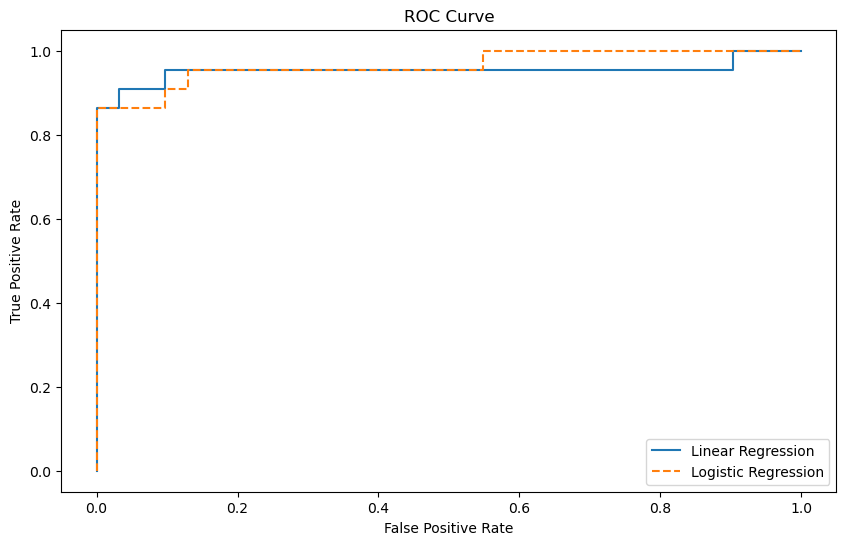

AUC for Linear Regression: 0.9530791788856304
AUC for Logistic Regression: 0.9648093841642229


In [22]:
### YOUR CODE HERE
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Predict probabilities for both models
linear_regression_preds = linear_regression_model.predict(X_test)
logistic_regression_probs = logistic_regression_model.predict_proba(X_test)[::, 1]

# Calculate ROC curve for both models
fpr_linear, tpr_linear, _ = roc_curve(y_test, linear_regression_preds)
fpr_logistic, tpr_logistic, _ = roc_curve(y_test, logistic_regression_probs)

# Plot ROC curves
plt.figure(figsize=(10, 6))
plt.plot(fpr_linear, tpr_linear, label='Linear Regression')
plt.plot(fpr_logistic, tpr_logistic, linestyle='--', label='Logistic Regression')
plt.title('ROC Curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

# Calculate AUC for both models
auc_linear = roc_auc_score(y_test, linear_regression_preds)
auc_logistic = roc_auc_score(y_test, logistic_regression_probs)

print(f'AUC for Linear Regression: {auc_linear}')
print(f'AUC for Logistic Regression: {auc_logistic}')

### YOUR CODE HERE

### 4. What is the optimal decision threshold to maximize the f1 score? Print the optimal threshold.
### How did you calculate the optimal threshold? Explain in the cell below.


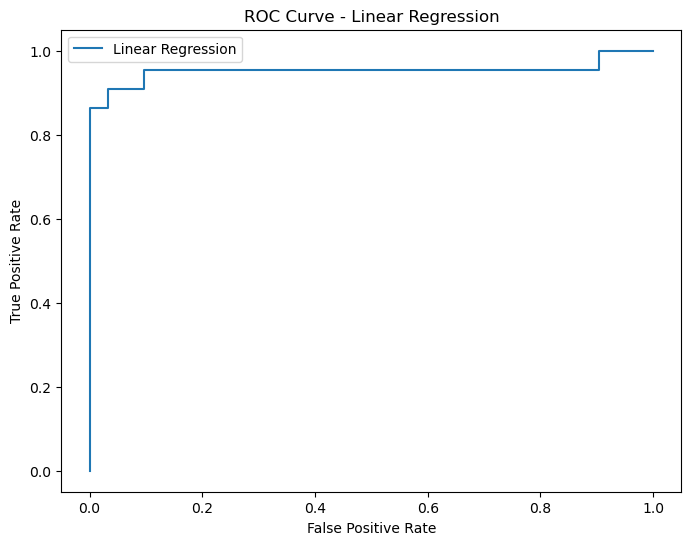

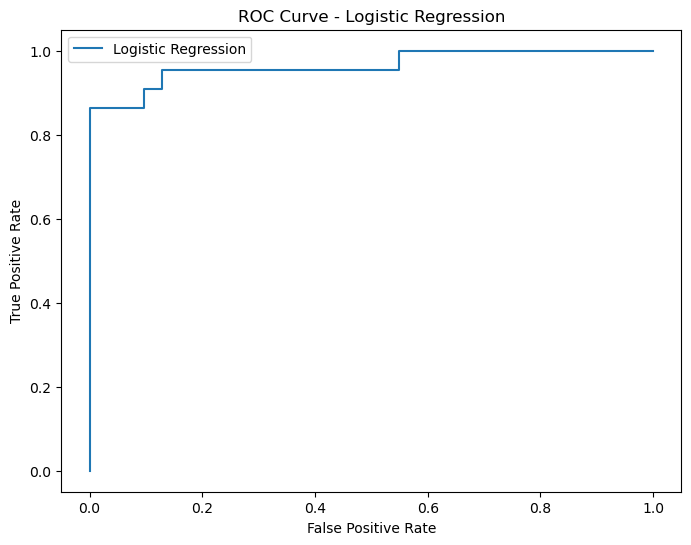

area under the curve for Linear Reg Model=  0.9530791788856304
area under the curve for Logistic Reg Model=  0.9648093841642229
Optimal Threshold for Linear Model=  0.15011863724741198
Optimal Threshold for Logistic Model=  0.16999999999999998


In [23]:
# Import required packages here
import numpy as np
from typing import Tuple, List
from sklearn.metrics import f1_score

def linear_pred_and_area_under_curve(linear_model, x_test: np.ndarray, y_test: np.ndarray) -> Tuple[np.array, np.array, np.array, np.array, float]:
    '''
        return the tuple consisting the predictions and area under the curve measurements of Linear Regression
        Model in the following order
        [linear_reg_pred, linear_reg_fpr, linear_reg_tpr, linear_threshold, linear_reg_area_under_curve]
        Finally plot the ROC Curve
    '''
    ### YOUR CODE HERE
    # Make predictions
    linear_reg_pred = linear_model.predict(x_test)
    
    # Calculate ROC curve
    linear_reg_fpr, linear_reg_tpr, linear_thresholds = roc_curve(y_test, linear_reg_pred)
    
    # Calculate area under curve (AUC)
    linear_reg_area_under_curve = roc_auc_score(y_test, linear_reg_pred)
    
    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(linear_reg_fpr, linear_reg_tpr, label='Linear Regression')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve - Linear Regression')
    plt.legend()
    plt.show()
    
    return linear_reg_pred, linear_reg_fpr, linear_reg_tpr, linear_thresholds, linear_reg_area_under_curve
    ### YOUR CODE HERE

def logistic_pred_and_area_under_curve(logistic_model, x_test: np.ndarray, y_test: np.ndarray) -> Tuple[np.array, np.array, np.array, np.array, float]:
    '''
        return the tuple consisting the predictions and area under the curve measurements of
        Logistic Regression Model in the following order
        [log_reg_pred, log_reg_fpr, log_reg_tpr, log_threshold, log_reg_area_under_curve]
        Finally plot the ROC Curve
    '''
    ### YOUR CODE HERE
    # Make probability predictions
    log_reg_pred = logistic_model.predict_proba(x_test)[:, 1]
    
    # Calculate ROC curve
    log_reg_fpr, log_reg_tpr, log_thresholds = roc_curve(y_test, log_reg_pred)
    
    # Calculate area under curve (AUC)
    log_reg_area_under_curve = roc_auc_score(y_test, log_reg_pred)
    
    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(log_reg_fpr, log_reg_tpr, label='Logistic Regression')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve - Logistic Regression')
    plt.legend()
    plt.show()
    
    return log_reg_pred, log_reg_fpr, log_reg_tpr, log_thresholds, log_reg_area_under_curve

    ### YOUR CODE HERE

linear_y_pred, linear_reg_fpr, linear_reg_tpr, linear_threshold, linear_reg_area_under_curve = linear_pred_and_area_under_curve(linear_regression_model, X_test, y_test)
log_y_pred, log_reg_fpr, log_reg_tpr, log_threshold, log_reg_area_under_curve = logistic_pred_and_area_under_curve(logistic_regression_model, X_test, y_test)


print('area under the curve for Linear Reg Model= ', linear_reg_area_under_curve )
print('area under the curve for Logistic Reg Model= ', log_reg_area_under_curve )

linear_optimal_threshold= -1
log_optimal_threshold= -1
### YOUR CODE HERE
'''
  Write code to determite the optimal threshold for linear and logistic regression
  and store them in linear_optimal_threshold and log_optimal_threshold
'''

# Create arrays of thresholds to consider
log_thresholds = np.arange(0.1, 1.0, 0.01)
linear_thresholds = np.arange(min(linear_y_pred), max(linear_y_pred), 0.01)

# Initialize variables to store the best F1 scores for both models
best_f1_score_log = 0
best_f1_score_linear = 0

# Loop through the thresholds for logistic regression
for threshold in log_thresholds:
    # Convert predicted probabilities to binary labels using the threshold
    predicted_labels_log = (log_y_pred > threshold).astype(int)
    
    # Calculate the F1 score for the current threshold
    f1_log = f1_score(y_test, predicted_labels_log)
    
    # Check if the current F1 score is better than the previous best F1 score
    if f1_log > best_f1_score_log:
        best_f1_score_log = f1_log
        log_optimal_threshold = threshold

for threshold in linear_thresholds:
    # Convert predicted values to binary labels using the threshold
    predicted_labels_linear = (linear_y_pred > threshold).astype(int)
    
    # Calculate the F1 score for the current threshold
    f1_linear = f1_score(y_test, predicted_labels_linear)
    
    # Check if the current F1 score is better than the previous best F1 score
    if f1_linear > best_f1_score_linear:
        best_f1_score_linear = f1_linear
        linear_optimal_threshold = threshold


### YOUR CODE HERE

print('Optimal Threshold for Linear Model= ', linear_optimal_threshold)
print('Optimal Threshold for Logistic Model= ', log_optimal_threshold)

Question: What is the optimal decision threshold to maximize the f1 score? How did you calculate the optimal threshold?

Note: Limit your answer to this cell

Answer: The optimal decision threshold to maximize the F1 score is the threshold value that provides the best balance between precision and recall. To determine the optimal decision threshold for maximizing the F1 score, I performed a threshold optimization process separately for logistic and linear regression models.

For the logistic regression model, I used the following steps:

1. Created an array of threshold values ranging from 0.1 to 1.0 with a step size of 0.01 (log_thresholds).
2. Initialized a variable best_f1_score_log to 0 to keep track of the best F1 score.
3. Iterated through each threshold value in log_thresholds.
4. For each threshold, I applied it to the logistic regression predictions (log_y_pred) to classify data points into two classes (0 or 1).
5. Calculated the F1 score using the true labels (y_test) and the predicted labels.
6. Compared the calculated F1 score with the current best F1 score (best_f1_score_log). If the new F1 score was higher, I updated best_f1_score_log and stored the threshold as log_optimal_threshold.

For the linear regression model, I followed a similar process:

1. Created an array of threshold values ranging from the minimum prediction value to the maximum prediction value with a step size of 0.01 (linear_thresholds).
2. Initialized a variable best_f1_score_linear to 0 to track the best F1 score for the linear regression model.
3. Iterated through each threshold value in linear_thresholds.
4. For each threshold, I applied it to the linear regression predictions (linear_y_pred) to classify data points into two classes.
5. Calculated the F1 score using the true labels (y_test) and the predicted labels.
6. Compared the calculated F1 score with the current best F1 score (best_f1_score_linear). If the new F1 score was higher, I updated best_f1_score_linear and stored the threshold as linear_optimal_threshold.
7. The log_optimal_threshold and linear_optimal_threshold values represent the decision thresholds that maximize the F1 score for the logistic and linear regression models, respectively. These thresholds are selected to achieve the best balance between precision and recall for each model's classification task.


### Optimal Threshold for Linear Model=  0.15011863724741198
### Optimal Threshold for Logistic Model=  0.16999999999999998


### 5. Five-fold Cross-validation: Repeat (1) using a stratified, five-fold cross-validation.


In [24]:
from sklearn.model_selection import StratifiedKFold

def train_test_folds(skf, num_of_folds: int) -> Tuple[np.ndarray, np.ndarray, np.ndarray, dict]:
    '''
        train and test in for loop with different training and test sets obatined from skf.
        use a PENALTY of 12 for logitic regression model for training
        find features in each fold and store them in features_count array.
        populate auc_log and auc_linear arrays with roc_auc_score of each set trained on logistic regression and linear regression models respectively.
        populate f1_log and f1_linear arrays with f1_score of each set trained on logistic regression and linear regression models respectively.
        return features_count, auc_log, auc_linear, f1_log and f1_linear
    '''
    num_of_folds = num_of_folds
    max_iter = 100000008

    X = features
    y = labels
    features_count = []  # Store the number of features used in each fold
    auc_log = []         # Store AUC scores for Logistic Regression in each fold
    auc_linear = []      # Store AUC scores for Linear Regression in each fold
    f1_log = []          # Store F1 scores for Logistic Regression in each fold
    f1_linear = []       # Store F1 scores for Linear Regression in each fold


    ### YOUR CODE HERE
    for train_index, test_index in skf.split(X, y):
        # Split the data into training and testing sets for the current fold
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Train a Linear Regression model on the current fold
        linear_regression_model = LinearRegression()
        linear_regression_model.fit(X_train, y_train)
        linear_reg_pred = linear_regression_model.predict(X_test)
        
        # Calculate and append AUC and F1 scores for Linear Regression
        auc_linear.append(roc_auc_score(y_test, linear_reg_pred))
        f1_linear.append(f1_score(y_test, (linear_reg_pred > 0.5).astype(int)))
        
        # Train a Logistic Regression model on the current fold
        logistic_regression_model = LogisticRegression(max_iter=max_iter, penalty='l2', C=1/12)
        logistic_regression_model.fit(X_train, y_train)
        log_reg_pred = logistic_regression_model.predict_proba(X_test)[:, 1]
        
        # Calculate and append AUC and F1 scores for Logistic Regression
        auc_log.append(roc_auc_score(y_test, log_reg_pred))
        f1_log.append(f1_score(y_test, (log_reg_pred > 0.5).astype(int)))

        # Store the number of features used in the current fold
        features_count.append(X_train.shape[1])

    # return lists containing evaluation metrics and feature counts for each fold
    return features_count, auc_log, auc_linear, f1_log, f1_linear
    ### YOUR CODE HERE


num_folds= 5
skf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state= 42)
features_count, auc_log, auc_linear, f1_log, f1_linear = train_test_folds(skf, num_folds)
print(features_count, auc_log, auc_linear, f1_log, f1_linear)

[21, 21, 21, 21, 21] [0.9557142857142857, 0.9199999999999999, 0.8994252873563218, 0.9375, 0.9568452380952381] [0.95, 0.8985714285714286, 0.9166666666666666, 0.9464285714285714, 0.9598214285714286] [0.9387755102040817, 0.9056603773584904, 0.875, 0.9361702127659574, 0.9199999999999999] [0.96, 0.9019607843137256, 0.8979591836734694, 0.9361702127659574, 0.9387755102040817]


### 6. Does the feature count change in each fold? Please explain in the cell below.


In [25]:
def is_features_count_changed(features_count: np.array) -> bool:
    '''
       compare number of features in each fold (features_count array's each element)
       return false if features count doesn't change in each fold. else return true
    '''
    ### YOUR CODE HERE
    return not all(count == features_count[0] for count in features_count)
    ### YOUR CODE HERE

# call is_features_count_changed function and print true if features count changes in each fold. else print false
print(is_features_count_changed(features_count))

False


Question: Do the features change in each fold?

Note: Limit your answer to this cell

Answer: No. The number of features remains the same across all folds. It suggests that the dataset was split consistently into folds, and each fold had the same set of features during the cross-validation process. This consistency ensures that the evaluation of models in each fold is fair and consistent.

In [26]:
import scipy.stats
def mean_confidence_interval(data: np.array, confidence=0.95) -> Tuple[float, float, float]:
    '''
        The required interval is from mean-h to mean+h
        return the tuple consisting of mean, mean-h, mean+h
    '''
    
    ### YOUR CODE HERE
    # Calculate mean and standard error
    mean = np.mean(data)
    sem = scipy.stats.sem(data)

    # Calculate confidence interval
    h = sem * scipy.stats.t.ppf((1 + confidence) / 2., len(data) - 1)

    # Calculate lower and upper bounds of confidence interval
    lower_bound = mean - h
    upper_bound = mean + h
    
    return mean, lower_bound, upper_bound
    ### YOUR CODE HERE

### 7. Please provide a mean and 95% confidence interval for the AUROCs for each model.

In [27]:
auc_linear_mean, auc_linear_open_interval, auc_linear_close_interval = 0, 0, 0
auc_log_mean, auc_log_open_interval, auc_log_close_interval = 0, 0, 0

print('mean and 95% confidence interval for the AUROCs for linear model= '    , mean_confidence_interval(auc_linear))
print('mean and 95% confidence interval for the AUROCs for logistic model= '  , mean_confidence_interval(auc_log))

mean and 95% confidence interval for the AUROCs for linear model=  (0.9342976190476191, 0.9024446367758503, 0.9661506013193879)
mean and 95% confidence interval for the AUROCs for logistic model=  (0.9338969622331691, 0.9035014005012012, 0.964292523965137)


### 8. Please provide a mean and 95% confidence interval for the f1 score for each model.

In [28]:
f1_linear_mean, f1_linear_open_interval, f1_linear_close_interval = 0, 0, 0
f1_log_mean, f1_log_open_interval, f1_log_close_interval = 0, 0, 0

print('mean and 95% confidence interval for the f1 score for linear model= '  , mean_confidence_interval(f1_linear))
print('mean and 95% confidence interval for the f1 score for linear model= '  , mean_confidence_interval(f1_log))

mean and 95% confidence interval for the f1 score for linear model=  (0.9269731381914468, 0.8942270710557645, 0.9597192053271291)
mean and 95% confidence interval for the f1 score for linear model=  (0.915121220065706, 0.8827092237460008, 0.9475332163854111)


# (B-iii) (10 points)

### Explain the mathematical derivation you used for implementing the training of your linear and logistic regression models.
---

(You should use LaTeX commands in a markdown cell to write the math)

Note: Limit your answer to this cell

**Linear Regression:**

1. **Model Assumption:**
   In linear regression, we assume that the relationship between the independent variable (input features) and the dependent variable (output) is linear. Mathematically, we express this as:

   $Y = w_0 + w_1X_1 + w_2X_2 + \ldots + w_nX_n + \epsilon$

   where:
   - $Y$ is the dependent variable.
   - $w_0$ is the intercept.
   - $w_1, w_2, \ldots, w_n$ are the coefficients of the independent variables $X_1, X_2, \ldots, X_n$.
   - $\epsilon$ is the error term, representing the noise or unexplained variation.

2. **Objective Function:**
   To find the best-fit line, we use the least squares method, which minimizes the sum of squared differences between the observed values and the predicted values:

   $L(w) = \sum_{i=1}^{N}(Y_i - \hat{Y}_i)^2$

   where:
   - $L(w)$ is the loss function.
   - $N$ is the number of data points.
   - $Y_i$ is the observed value.
   - $\hat{Y}_i$ is the predicted value.

3. **Minimizing the Loss:**
   We minimize the loss by finding the values of $w_0, w_1, \ldots, w_n$ that minimize $L(w)$. This is often done using gradient descent or closed-form solutions like the normal equation or using ordinary least squares as described in A-v.


**Logistic Regression:**

1. **Model Assumption:**
   It models the probability that an input belongs to a particular class using the logistic (sigmoid) function:

   $P(Y=1|X) = \frac{1}{1 + e^{-(w_0 + w_1X_1 + w_2X_2 + \ldots + w_nX_n)}}$

   Here, $P(Y=1|X)$ is the probability that the output belongs to class 1.

2. **Objective Function (Log-Likelihood):**
   In logistic regression, we maximize the log-likelihood function, which measures how well the model's predicted probabilities match the actual class labels in the training data. The log-likelihood for binary classification is:

   $L(w) = \sum_{i=1}^{N} \left(y_i \log(p_i) + (1 - y_i) \log(1 - p_i)\right)$

   where:
   - $L(w)$ is the log-likelihood.
   - $N$ is the number of data points.
   - $y_i$ is the actual class label (0 or 1).
   - $p_i$ is the predicted probability of belonging to class 1.

3. **Maximizing the Log-Likelihood:**
   We maximize the log-likelihood by finding the values of $w_0, w_1, \ldots, w_n$ that maximize $L(w)$. This can be done using optimization techniques like gradient ascent or specialized solvers.

For two-class classification problems, inputs are $x \in \mathbf{R}^p$, and outputs are $y \in {0, 1}$. The training data $X$ is ${(x_1, y_1), ..., (x_n, y_n)}$. The model parameter is $w$. The model of the problem looks like this:
$$p(y|x,w) = \sigma(w^Tx), \sigma(\eta) = \frac{1}{1+e^{-\eta}} = \frac{e^\eta}{1+e^\eta}$$
$$  y = \begin{cases}
    1, p(y | {x,w}) > 0.5 \\
    0, otherwise
    \end{cases}
$$
In logistic regression, we train model by taking probabilistic loss function and then try to maximize the likelihood. We want to find optimal parameters $\theta$ such that the likelihood is maximized. The equation for the optimal parameter $\theta$ is:
$$\hat{\theta} = \underset{\theta}{\arg\max}L(\theta;x)$$

To simplify, we take a log of the likelihood and minimize the negative of the log likelihood. Thus we get a loss function which is differentiable which can be used for logistic regression. This negative log-likelihood is also known as cross-entropy error.

Negative log-likelihood for multiple logistic regression can be written as:
$$NLL(w) = - \sum_{i=1}^{n} (y_i\log\sigma(w^Tx_i) + (1 - y_i)\log{(1 - \sigma(w^Tx_i)))}$$

When we recast our $\hat{y}$ to $\{-1,1\}$ instead of $\{0,1\}$, we get an equation which has no closed form solution.
$$NLL(w) = - \sum_{i=1}^{n} (\log{(1+e^{-\tilde{y_i}w^Tx_i}))}$$

The training in the logistic regression alters the step-like nature of the sigmoid. $\sigma(w^Tx_i)$ is sigmoid function which will never touch 0 because numerator, $e^{w^Tx}$ will never hit 0.

Gradient descent is used to optimize the cross entropy error. We find weights $w$ of logistic regression that minimize error. We take second derivative test to check for global optimum.
